# Loan Repayment Analysis

In [1398]:
import warnings
warnings.filterwarnings('ignore')

In [1399]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Application Dataset

## Loading the Application Data set

In [1400]:
application = pd.read_csv("application_data.csv")
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [1401]:
application.shape

(307511, 122)

In [1402]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Missing Values - Application Dataset

In [1403]:
round(100*application.isnull().sum()/len(application.index),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [1404]:
#Retaining only the columns with less than 20% missing values
dfapp = application.loc[:,(application.isnull().sum(axis=0)/len(application)) < 0.20]
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
round(100*dfapp.isnull().sum()/len(dfapp.index),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 72, dtype: float64

In [1405]:
dfapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

## Drop Unnecessary Columns - Application Dataset

In [1406]:
# Drop other unnecessary and duplicate columns like EXT_SOURCE_2,'FLAG_PHONE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START' 
dfapp.drop(['EXT_SOURCE_2','EXT_SOURCE_3','FLAG_PHONE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'], axis = 1, inplace = True)
# Since all rows have atleast 1 unsubmitted document drop columns having Column name as FLAG_DOCUMENT_*
dfapp.drop(list(dfapp.filter(regex = 'FLAG_DOCUMENT')), axis = 1, inplace = True)
# Drop columns having Column name as AMT_REQ_CREDIT_BUREAU_*
dfapp.drop(list(dfapp.filter(regex = 'AMT_REQ_CREDIT_BUREAU')), axis = 1, inplace = True)

dfapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH             

In [1407]:
round(100*dfapp.isnull().sum()/len(dfapp.index),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY 

## Impute Columns/Bin Columns - Application Dataset

In [1408]:
# Impute columns having NULL values with Mean 
dfapp.loc[pd.isnull(dfapp['OBS_30_CNT_SOCIAL_CIRCLE']),['OBS_30_CNT_SOCIAL_CIRCLE']] = dfapp['OBS_30_CNT_SOCIAL_CIRCLE'].mean()
dfapp.loc[pd.isnull(dfapp['DEF_30_CNT_SOCIAL_CIRCLE']),['DEF_30_CNT_SOCIAL_CIRCLE']] = dfapp['DEF_30_CNT_SOCIAL_CIRCLE'].mean()
dfapp.loc[pd.isnull(dfapp['OBS_60_CNT_SOCIAL_CIRCLE']),['OBS_60_CNT_SOCIAL_CIRCLE']] = dfapp['OBS_60_CNT_SOCIAL_CIRCLE'].mean()
dfapp.loc[pd.isnull(dfapp['DEF_60_CNT_SOCIAL_CIRCLE']),['DEF_60_CNT_SOCIAL_CIRCLE']] = dfapp['OBS_60_CNT_SOCIAL_CIRCLE'].mean()
dfapp.loc[dfapp['CODE_GENDER'] == 'XNA','CODE_GENDER'] = 'F'

round(100*dfapp.isnull().sum()/len(dfapp.index),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY 

In [1409]:
dfapp[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head(10)
# Days are having negative values

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
5,-16941,-1588,-4970.0,-477
6,-13778,-3130,-1213.0,-619
7,-18850,-449,-4597.0,-2379
8,-20099,365243,-7427.0,-3514
9,-14469,-2019,-14437.0,-3992


In [1410]:
# Convert Birth days and Days Employed into years
dfapp['DAYS_BIRTH'] = dfapp['DAYS_BIRTH'].abs() # To avoid negative values
dfapp['YEARS_BIRTH'] = dfapp['DAYS_BIRTH']//365 
dfapp['DAYS_EMPLOYED'] = dfapp['DAYS_EMPLOYED'].abs() # To avoid negative values
dfapp['YEARS_EMPLOYED'] = dfapp['DAYS_EMPLOYED']//365
# Convert Days Registration and Days Id Publish to avoid non-negative values
dfapp['DAYS_REGISTRATION'] = dfapp['DAYS_REGISTRATION'].abs()
dfapp['DAYS_ID_PUBLISH'] = dfapp['DAYS_ID_PUBLISH'].abs()

In [1411]:
# Bin Different Organization Type to generic categories
d = {'Transport:':'Transport','Trade:':'Trade','Industry:':'Industry','Business Entity Type':'Business',
    'Police':'Government','Military':'Goverment','Postal':'Government','Kindergarten':'Education','School':'Education',
    'University':'Education'}

for k,v in d.items():
    dfapp.loc[dfapp['ORGANIZATION_TYPE'].str.contains(k), 'ORGANIZATION_TYPE'] = v

## Column Datatype Treatment

In [1412]:
# Change Target Column type to boolean
dfapp['TARGET'] = dfapp['TARGET'].astype('bool')
# Change Family Member count from Float to Integer
dfapp['CNT_FAM_MEMBERS'] = dfapp['CNT_FAM_MEMBERS'].astype('Int32')
# Change Yes or No Data types to boolean
dfapp['FLAG_MOBIL'] = dfapp['FLAG_MOBIL'].astype('bool')
dfapp['FLAG_EMP_PHONE'] = dfapp['FLAG_EMP_PHONE'].astype('bool')
dfapp['FLAG_WORK_PHONE'] = dfapp['FLAG_WORK_PHONE'].astype('bool')
dfapp['FLAG_CONT_MOBILE'] = dfapp['FLAG_CONT_MOBILE'].astype('bool')
dfapp['FLAG_EMAIL'] = dfapp['FLAG_EMAIL'].astype('bool')
dfapp['REG_REGION_NOT_LIVE_REGION'] = dfapp['REG_REGION_NOT_LIVE_REGION'].astype('bool')
dfapp['REG_REGION_NOT_WORK_REGION'] = dfapp['REG_REGION_NOT_WORK_REGION'].astype('bool')
dfapp['LIVE_REGION_NOT_WORK_REGION'] = dfapp['LIVE_REGION_NOT_WORK_REGION'].astype('bool')
dfapp['REG_CITY_NOT_LIVE_CITY'] = dfapp['REG_CITY_NOT_LIVE_CITY'].astype('bool')
dfapp['REG_CITY_NOT_WORK_CITY'] = dfapp['REG_CITY_NOT_WORK_CITY'].astype('bool')
dfapp['LIVE_CITY_NOT_WORK_CITY'] = dfapp['LIVE_CITY_NOT_WORK_CITY'].astype('bool')
dfapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null bool
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH              

## Finding Outliers - Application Dataset

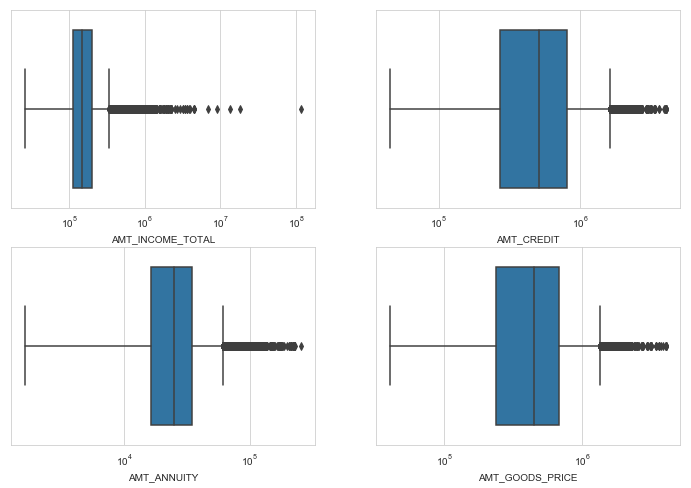

In [1413]:
# Find Outliers in the Columns
OutliersList = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
f,axes = plt.subplots(2,2,figsize=(12, 8))
for i, ax in enumerate(axes.reshape(-1)):
    g = sns.boxplot(x=dfapp[OutliersList[i]],ax=ax)
    g.set_xscale("log") 
plt.show()

# We observe a Big outlier in Amt Income Total

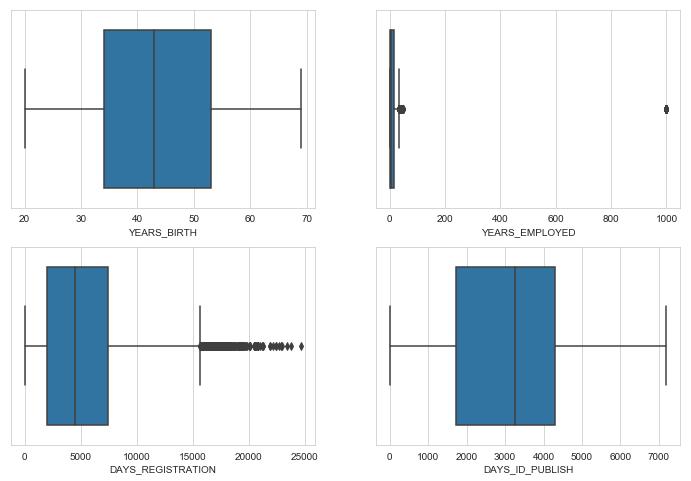

In [1414]:
OutliersList2 = ['YEARS_BIRTH','YEARS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
f,axes = plt.subplots(2,2,figsize=(12, 8))
for i, ax in enumerate(axes.reshape(-1)):
    g = sns.boxplot(x=dfapp[OutliersList2[i]],ax=ax)
plt.show()
# We observe a big outlier in Years Employed

In [1415]:
dfapp[OutliersList2].quantile([0.10,0.5,0.75,0.82,0.95,0.999,1.0])

,YEARS_BIRTH,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0.100,28.0,1.0,690.00,730.0
0.500,43.0,6.0,4504.00,3254.0
0.750,53.0,15.0,7479.50,4299.0
0.820,56.0,1000.0,8541.00,4485.0
0.950,63.0,1000.0,11416.00,4944.0
0.999,68.0,1000.0,16502.98,6038.0
1.000,69.0,1000.0,24672.00,7197.0


## Treating Outliers - Application Dataset
* Quantile-based Flooring and Capping, remove the outliers(below 0.01 and above 0.99)

In [1416]:
print(dfapp['AMT_INCOME_TOTAL'].skew(),dfapp['AMT_GOODS_PRICE'].skew(),dfapp['AMT_CREDIT'].skew(),dfapp['AMT_ANNUITY'].skew())

391.5596541041876 1.3490003414747445 1.2347784971349398 1.5797773638612507


In [1417]:
#Treating the outliers of AMT_INCOME_TOTAL
dfapp = dfapp[dfapp['AMT_INCOME_TOTAL'] < dfapp['AMT_INCOME_TOTAL'].quantile(0.99)]
dfapp = dfapp[dfapp['AMT_INCOME_TOTAL'] > dfapp['AMT_INCOME_TOTAL'].quantile(0.01)]

print(dfapp['AMT_INCOME_TOTAL'].skew())

1.208383219943378


In [1418]:
#Treating the outliers of AMT_GOODS_PRICE
dfapp = dfapp[dfapp['AMT_GOODS_PRICE'] < dfapp['AMT_GOODS_PRICE'].quantile(1.0)]
dfapp = dfapp[dfapp['AMT_GOODS_PRICE'] > dfapp['AMT_GOODS_PRICE'].quantile(0.01)]

print(dfapp['AMT_GOODS_PRICE'].skew())

1.3146259626725463


In [1419]:
#Treating the outliers of AMT_ANNUITY
dfapp["AMT_ANNUITY"] = np.where(dfapp["AMT_ANNUITY"] <11074.5, 11074.5,dfapp['AMT_ANNUITY'])
dfapp["AMT_ANNUITY"] = np.where(dfapp["AMT_ANNUITY"] >258025.5, 258025.5,dfapp['AMT_ANNUITY'])
print(dfapp['AMT_ANNUITY'].skew())

1.4375208786613176


In [1420]:
#Treating the outliers of AMT_CREDIT
dfapp["AMT_CREDIT"] = np.where(dfapp["AMT_CREDIT"] <180000.0, 180000.0,dfapp['AMT_CREDIT'])
dfapp["AMT_CREDIT"] = np.where(dfapp["AMT_CREDIT"] >4050000.0, 4050000.0,dfapp['AMT_CREDIT'])
print(dfapp['AMT_CREDIT'].skew())

1.2470044291931595


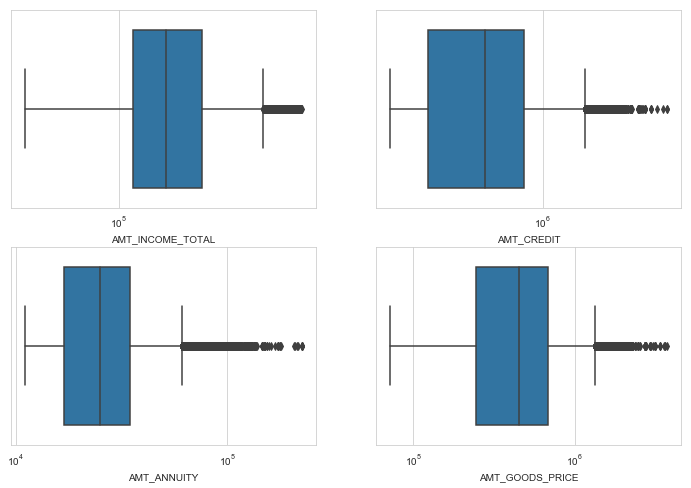

In [1421]:
# Outliers in the Columns after Treatment
OutliersList = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
f,axes = plt.subplots(2,2,figsize=(12, 8))
for i, ax in enumerate(axes.reshape(-1)):
    g = sns.boxplot(x=dfapp[OutliersList[i]],ax=ax)
    g.set_xscale("log") 
plt.show()

### Treating Years Employed column

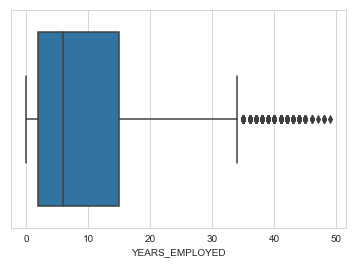

In [1422]:
dfapp['YEARS_EMPLOYED'] = np.where(dfapp["YEARS_EMPLOYED"] > 100.0, dfapp['YEARS_BIRTH']//2,dfapp['YEARS_EMPLOYED'])
sns.boxplot(x=dfapp['YEARS_EMPLOYED'])
plt.show()                         

## Data Imbalance - Application Dataset

Class 0 (No Payment Difficulties) : 273144
Class 1 (Payment Difficulties) : 24197
Imbalance Ratio: 11.29 : 1


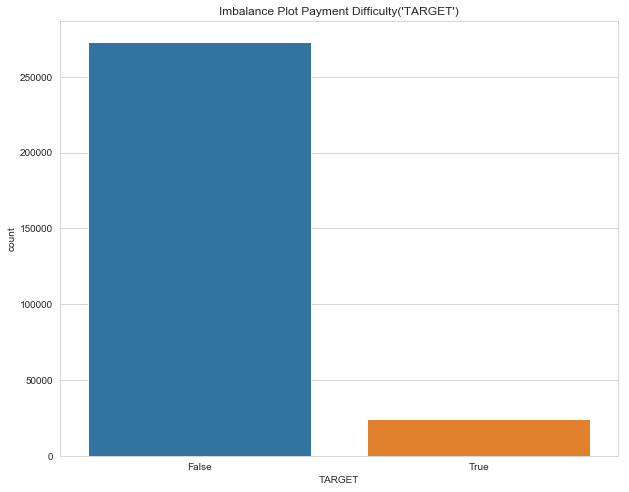

In [1423]:
# Check Data Imbalance for TARGET column
target_count = dfapp['TARGET'].value_counts()
print('Class 0 (No Payment Difficulties) :', target_count[0])
print('Class 1 (Payment Difficulties) :', target_count[1])
print('Imbalance Ratio:', round(target_count[0] / target_count[1], 2), ': 1')
 # Plot indicates there are less clients with payment difficulties (around 11.39) compared to other cases
plt.figure(figsize=(10,8))
sns.countplot(dfapp['TARGET']).set_title("Imbalance Plot Payment Difficulty('TARGET')")
plt.show()

## Identifying Corelations

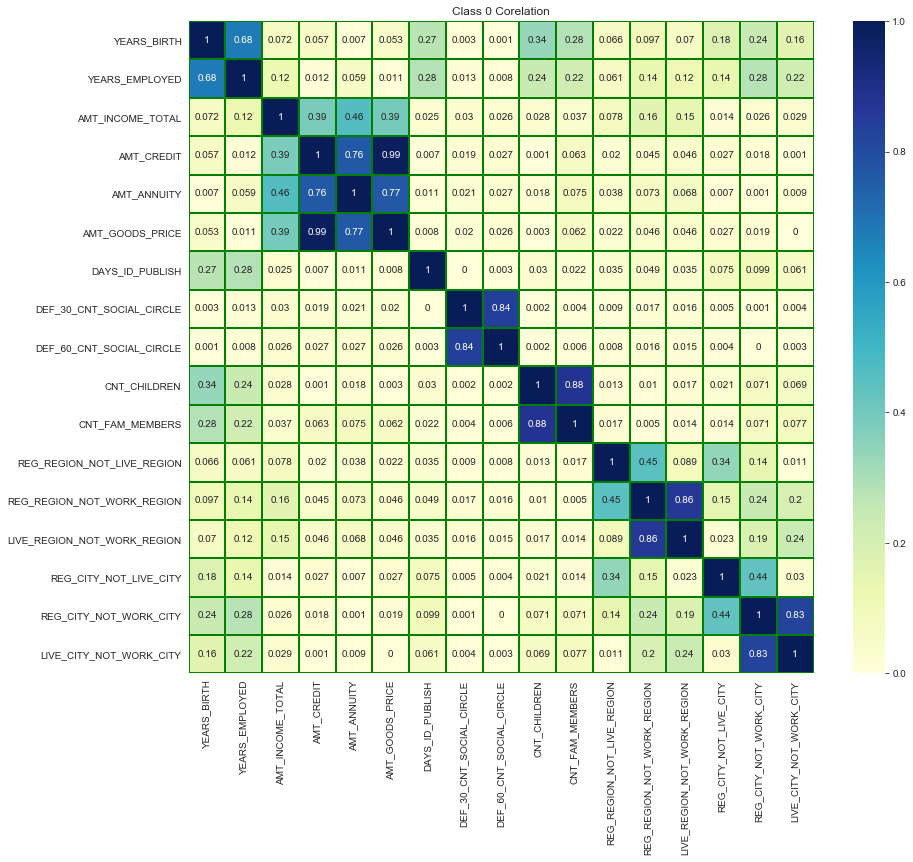

In [1424]:
# Segment the dataframe based on TARGET variable
dfclass0 = dfapp[dfapp['TARGET'] == False]
dfclass1 = dfapp[dfapp['TARGET'] == True]

corrList = ['YEARS_BIRTH','YEARS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
            'DAYS_ID_PUBLISH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
            'CNT_CHILDREN','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

# Heatmap for Class 0 category
plt.figure(figsize=(14,12))
#corr = dfclass0.corr().abs()
corr = dfclass0[corrList].corr().abs()
sns.heatmap(round(corr,3),cmap = "YlGnBu",annot = True,linewidths=1,linecolor='Green').set_title("Class 0 Corelation")
plt.show()

In [1425]:
# Top 10 corelation for Class 0 Category
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)[:10]

AMT_CREDIT                  AMT_GOODS_PRICE                0.986299
CNT_CHILDREN                CNT_FAM_MEMBERS                0.878325
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.862085
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.839708
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830067
AMT_ANNUITY                 AMT_GOODS_PRICE                0.768900
AMT_CREDIT                  AMT_ANNUITY                    0.761584
YEARS_BIRTH                 YEARS_EMPLOYED                 0.680471
AMT_INCOME_TOTAL            AMT_ANNUITY                    0.462050
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.448158
dtype: float64

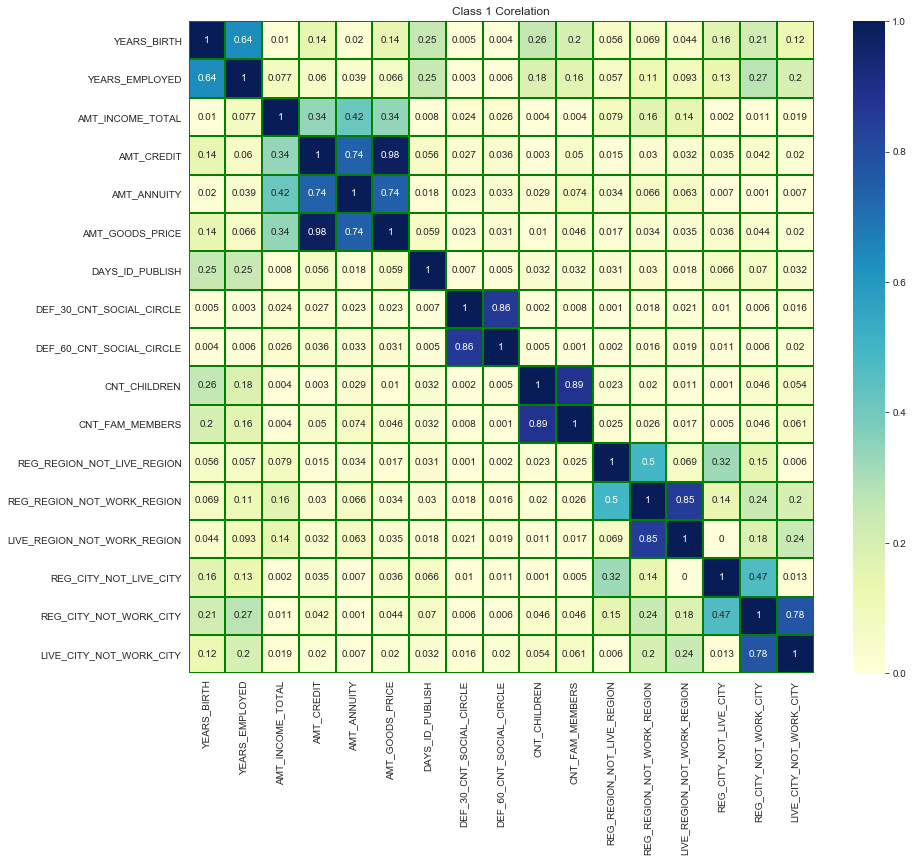

In [1426]:
# Heatmap for Class 1 category
plt.figure(figsize=(14,12))
corr = dfclass1[corrList].corr().abs()
sns.heatmap(round(corr,3),cmap = "YlGnBu",annot = True,linewidths=1,linecolor='Green').set_title("Class 1 Corelation")
plt.show()

In [1427]:
# Top 10 corelation for Class 1 Category
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)[:10]

AMT_CREDIT                  AMT_GOODS_PRICE                0.982209
CNT_CHILDREN                CNT_FAM_MEMBERS                0.885167
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.862609
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.848596
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.777345
AMT_ANNUITY                 AMT_GOODS_PRICE                0.745334
AMT_CREDIT                  AMT_ANNUITY                    0.741127
YEARS_BIRTH                 YEARS_EMPLOYED                 0.635210
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.497182
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.472397
dtype: float64

# Previous Application Dataset

##  Loading Previous Application Dataset

In [1428]:
prev_app = pd.read_csv("previous_application.csv")

In [1429]:
prev_app.shape

(1670214, 37)

In [1430]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

## Missing Values - Previous Application Dataset

In [1431]:
round(100*prev_app.isnull().sum()/len(prev_app.index),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

## Finding Outliers - Previous Application Dataset

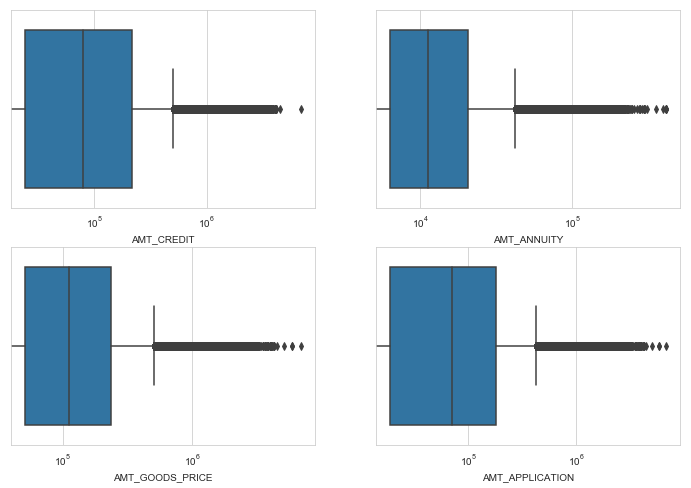

In [1432]:
# Find Outliers in the Columns
OutliersList = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_APPLICATION']
f,axes = plt.subplots(2,2,figsize=(12, 8))
for i, ax in enumerate(axes.reshape(-1)):
    g = sns.boxplot(x=prev_app[OutliersList[i]],ax=ax)
    g.set_xscale("log") 
plt.show()

In [1433]:
prev_app[OutliersList].quantile([0.5,0.95,0.999,1.0])

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_APPLICATION
0.500,80541.0,11250.000,112320.0,71046.0
0.950,886500.0,45336.780,900000.0,787500.0
0.999,2517300.0,119231.415,2250000.0,2250000.0
1.000,6905160.0,418058.145,6905160.0,6905160.0


## Merging Application Dataset and Previous Application Dataset

In [1434]:
df_merge = dfapp.merge(prev_app.drop_duplicates(subset='SK_ID_CURR'),how='left',on='SK_ID_CURR',left_index=True)

In [1435]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 297341 entries, 892077.0 to 214743.0
Data columns (total 78 columns):
SK_ID_CURR                     297341 non-null int64
TARGET                         297341 non-null bool
NAME_CONTRACT_TYPE_x           297341 non-null object
CODE_GENDER                    297341 non-null object
FLAG_OWN_CAR                   297341 non-null object
FLAG_OWN_REALTY                297341 non-null object
CNT_CHILDREN                   297341 non-null int64
AMT_INCOME_TOTAL               297341 non-null float64
AMT_CREDIT_x                   297341 non-null float64
AMT_ANNUITY_x                  297329 non-null float64
AMT_GOODS_PRICE_x              297341 non-null float64
NAME_INCOME_TYPE               297341 non-null object
NAME_EDUCATION_TYPE            297341 non-null object
NAME_FAMILY_STATUS             297341 non-null object
NAME_HOUSING_TYPE              297341 non-null object
REGION_POPULATION_RELATIVE     297341 non-null float64
DAYS_BIRTH   

In [1436]:
df_merge.drop(['SK_ID_PREV','SK_ID_CURR','AMT_DOWN_PAYMENT','CHANNEL_TYPE','CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_TERMINATION'], axis = 1, inplace = True)

## Univariate & Segmented Univariate Analysis

In [1437]:
def plot_discrete(column,xlabel,pal='Set2',figx=14,figy=6,stacked=False):
    if stacked == True:
        fig, axes = plt.subplots(nrows=3, figsize=(figx,figy))
        fig.subplots_adjust(hspace = 0.6)
    else:
        fig, axes = plt.subplots(ncols=3, figsize=(figx,figy))
        fig.subplots_adjust(wspace = 0.3)
    temp = df_merge[column].value_counts()
    ylabel = 'Loan Count'
    df1 = pd.DataFrame({column: temp.index,ylabel: temp.values})
    g = sns.barplot(ax=axes[0], x = column,y=ylabel,data=df1,palette=pal)
    g.set_xlabel(xlabel,fontsize=14)
    g.set_ylabel(ylabel,fontsize=14)
    # Since all the rows of TARGET are either True or False, we can use Mean to calculate
    # Payment difficulty and No-Payment difficulty %
    class1 = df_merge[[column, 'TARGET']].groupby(column,as_index=False).mean()
    class1.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(ax=axes[1], x = column,y='TARGET', data=class1, palette=pal)
    s.set_xlabel(xlabel,fontsize=14)
    s.set_ylabel("Payment Difficulty % (Class 1)",fontsize=14)
    # Calculate Mean of Class 0
    class0 = class1
    class0['TARGET'] = 1.0 - class1['TARGET']
    class0.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(ax=axes[2], x = column,y='TARGET', data=class0, palette=pal)
    s.set_xlabel(xlabel,fontsize=14)
    s.set_ylabel("No Payment Difficulty % (Class 0)",fontsize=14)
    plt.show()

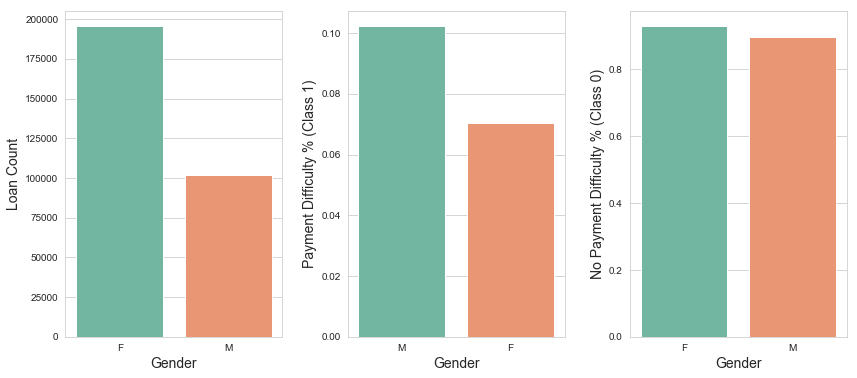

In [1438]:
plot_discrete('CODE_GENDER','Gender')

# The number of female clients are almost double the number of male clients.  
# Also males have higher chance of not returning their loans Class 1 (~10%) compared to women (~7%) 
# Almost 90% of the loans are being repaid Class 0 by both Genders.

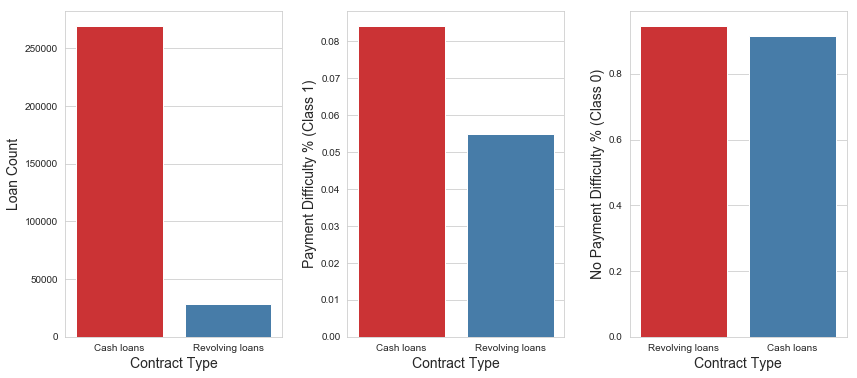

In [1439]:
plot_discrete('NAME_CONTRACT_TYPE_x','Contract Type','Set1')

# Revolving loans are very small fraction (10%) compared to Cash loans.
# Around 8.5% of Cash loans are facing Payment difficulties(Class 1) compared to revolving loans at 5.5%
# More than 90% of the loans of both type are not facing any Payment difficulties

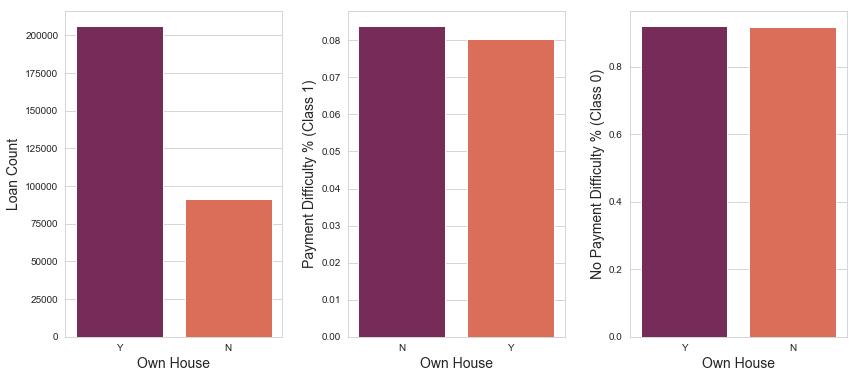

In [1440]:
plot_discrete('FLAG_OWN_REALTY', 'Own House','rocket')

# The clients having own House are more than double of the ones that don't own a House. 
# Both categories (owning real estate or not owning) have non-repayment rates less than 8%
# More than 90% of the clients owning or not owning house have no payment difficulties

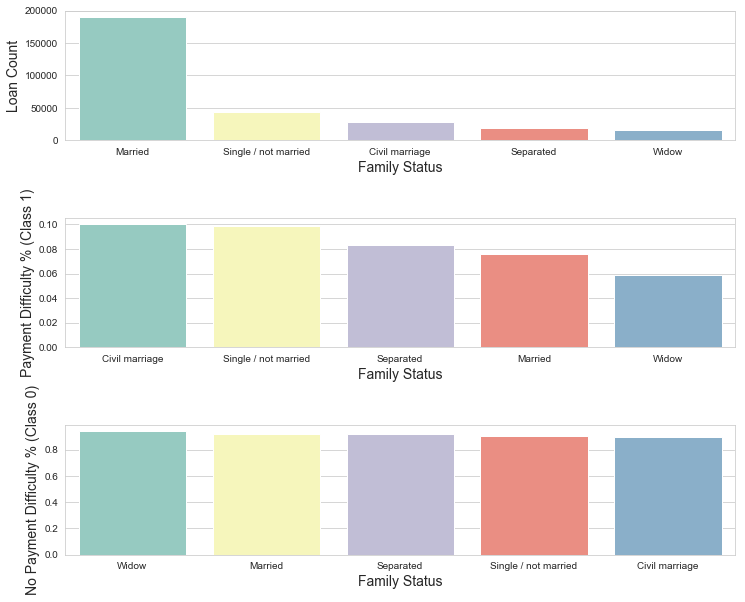

In [1441]:
plot_discrete('NAME_FAMILY_STATUS','Family Status','Set3',12,10,True)

# Most of clients are married, followed by Single/not married and civil marriage.
# Civil marriage has the highest percent of not repayment Class 1 (10%), with Widow the lowest (exception being Unknown).

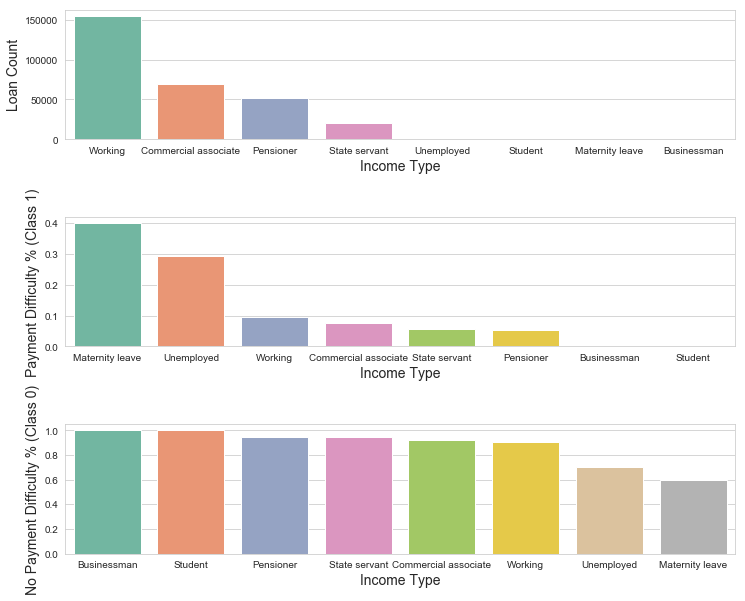

In [1442]:
plot_discrete('NAME_INCOME_TYPE','Income Type','Set2',12,10,True)

# Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and 
# State servant.
# The applicants with Maternity leave income type have almost 40% of not returning loans Class 1, 
# followed by Unemployed at 37%. The rest of types of incomes are under average of 10%

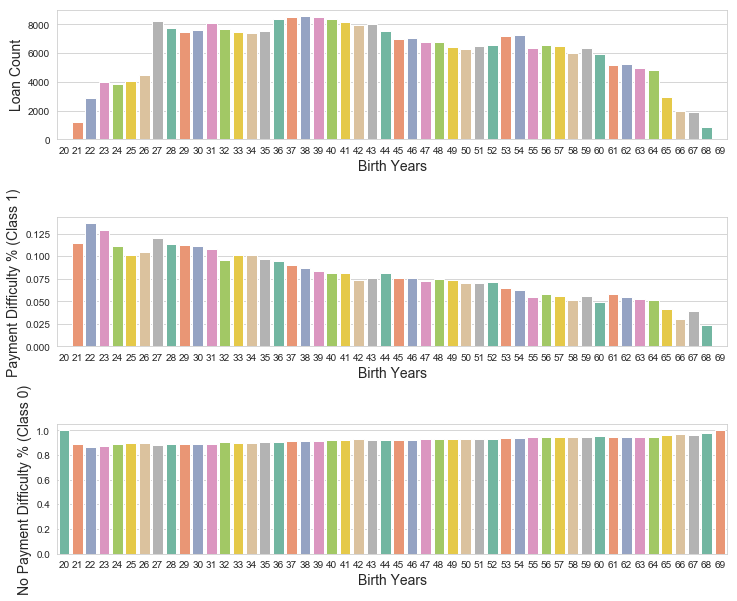

In [1443]:
plot_discrete('YEARS_BIRTH','Birth Years','Set2',12,10,True)

# Most of the loan applicants are between age group 27 to 64. Young people with age less than 25 years
# face more loan repayment difficulties exceeding 10% approximately

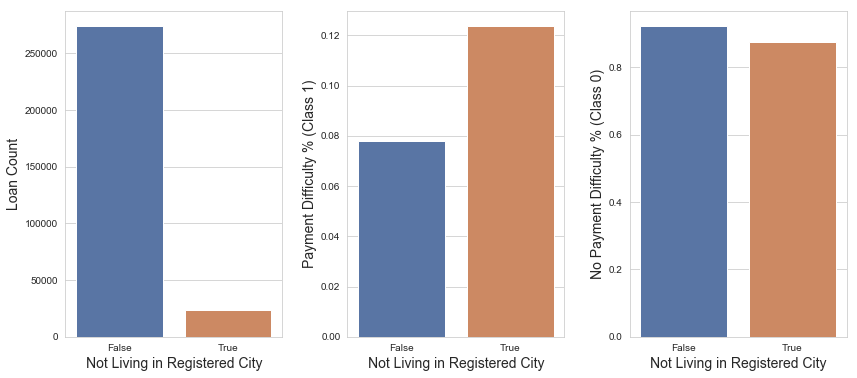

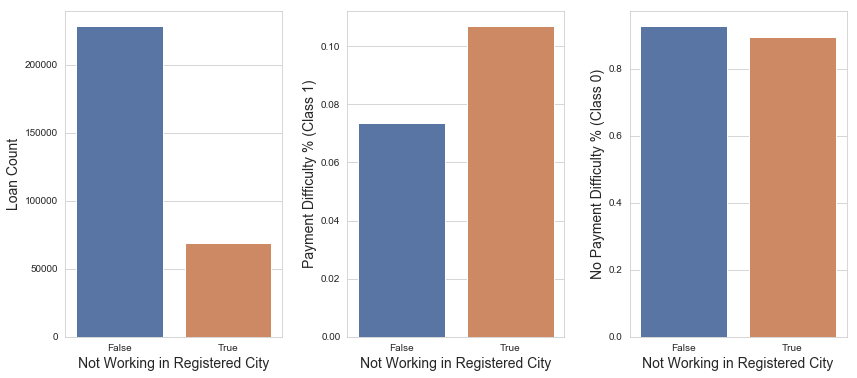

In [1444]:
plot_discrete('REG_CITY_NOT_LIVE_CITY','Not Living in Registered City','deep')
plot_discrete('REG_CITY_NOT_WORK_CITY','Not Working in Registered City','deep')

# Plot indicates that more people register in the same city they live or work .
# The ones that register in different city than the working or living city are having 
# payment difficulties Class 1 (work 11% or live 12%). 
# More than 85% of clients in both categories don't any payment difficulties Class 0

In [1445]:
def plot_continuous(column,name,binsize,color='Green'):
    plt.figure(figsize=(12,8))
    g = sns.distplot(df_merge[column],color=color, kde=True,bins=binsize)
    sns.set_style('whitegrid')
    g.set_xlabel(name,fontsize=14)
    plt.show() 

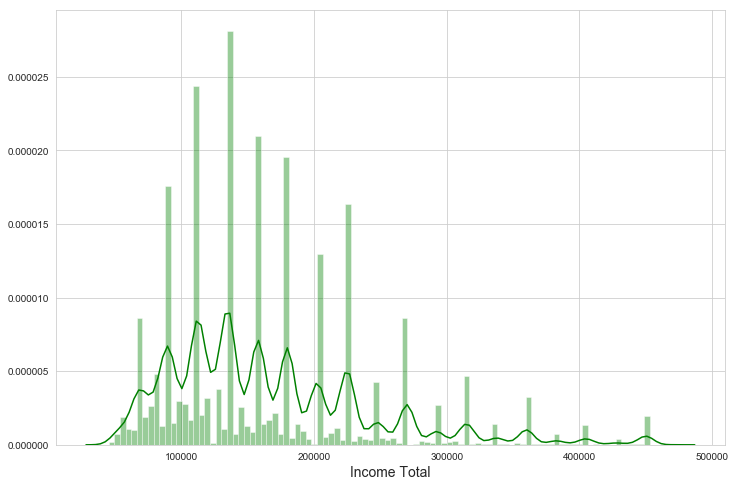

In [1446]:
plot_continuous('AMT_INCOME_TOTAL','Income Total',100,'Green')

# Majority of the loan applicants have income between 10L to 25L with average loan applicants 
# earning 15L

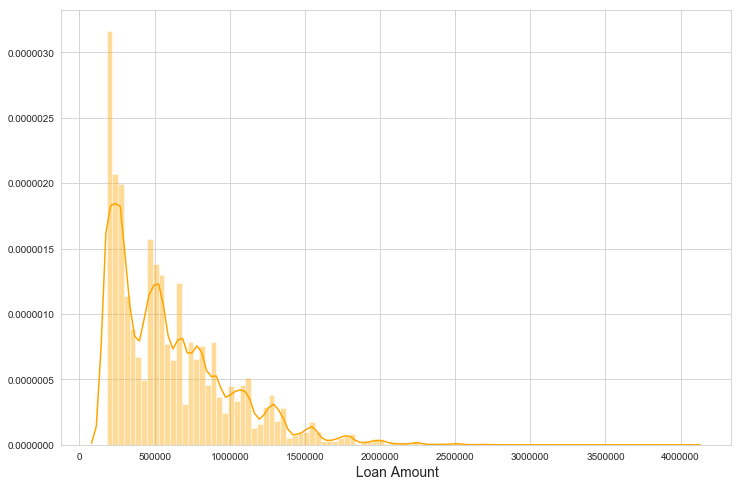

In [1447]:
plot_continuous('AMT_CREDIT_x',' Loan Amount',100,'Orange')

# Majority of loan amount lies in the ramge 5L to 10L with average around 5L

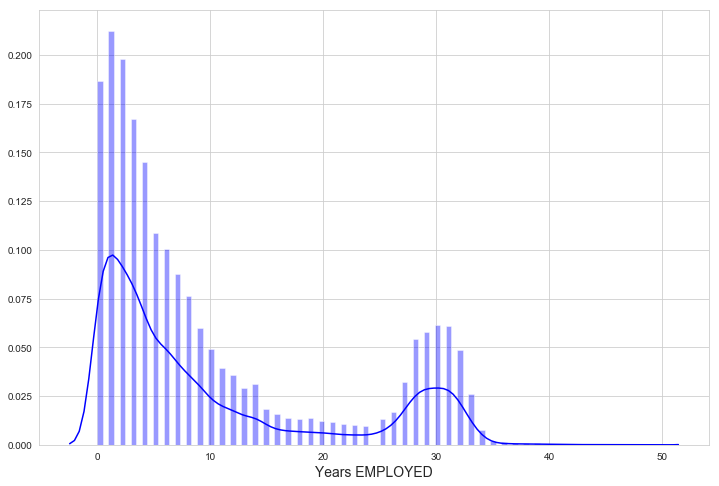

In [1448]:
plot_continuous('YEARS_EMPLOYED','Years EMPLOYED',100,'Blue')

# Most of the loan applicants are less than 10 years employed. We could observe less loan applicants
# between 10 to 30 years of experience

## Bivariate Analysis

In [1449]:
def plot_cat_bivariate(column1,column2,xlabel,ylabel,figx=12,figy=6,stacked=False):
    if stacked == True:
        fig, axes = plt.subplots(nrows=2, figsize=(figx,figy))
    else:
        fig, axes = plt.subplots(ncols=2, figsize=(figx,figy))
    #plt.figure(figsize=(figx,figy))
    g = sns.countplot(ax=axes[0],data =df_merge, x=column1, hue=column2)
    g.set_xlabel(xlabel,fontsize=14)
    g.set_ylabel(ylabel,fontsize=14)
    
    class1 = df_merge[[column1, 'TARGET']].groupby(column1,as_index=False).mean()
    class1.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(ax=axes[1], x = column1,y='TARGET', data=class1)
    s.set_xlabel(xlabel,fontsize=14)
    s.set_ylabel("Payment Difficulty %",fontsize=14)
    
    plt.show()

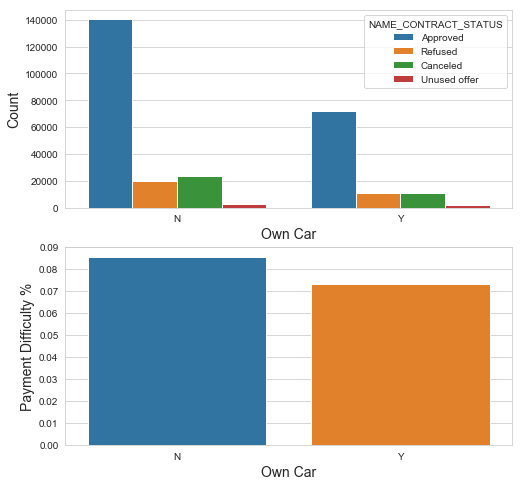

In [1450]:
plot_cat_bivariate('FLAG_OWN_CAR','NAME_CONTRACT_STATUS','Own Car','Count',8,8,True)

# Plot indicates that more clients without Owning Car have got loan approvals previosuly compared
# to clients owning a car (around 2 times). But still clients with or without car both have payment 
# difficulty around 8% approximately.

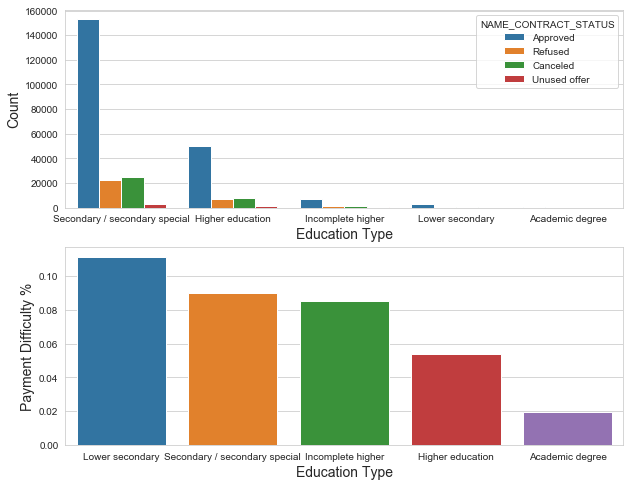

In [1451]:
plot_cat_bivariate('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS','Education Type','Count',10,8,True)

# Plot indicates Clients with Secondary Education have higher count of loan approvals previously around 15500 followed by 
# Higher Education Clients around 5000. But Clients with Lower secondary have higher payment difficulty (~11%),
# followed by Secondary(~9%) and Incomplete Higher(~8.25%)
# Clients with Academic degree don't have much payment difficulty (~2%)

In [1452]:
def plot_cat_continuous_bivariate(column1,column2,xlabel,ylabel,figx=12,figy=6,stacked=False):
    if stacked == True:
        fig, axes = plt.subplots(nrows=2, figsize=(figx,figy))
    else:
        fig, axes = plt.subplots(ncols=2, figsize=(figx,figy))
    g = sns.boxplot(ax=axes[0],data =df_merge, x=column1, y=column2)
    g.set_xlabel(xlabel,fontsize=14)
    g.set_ylabel(ylabel,fontsize=14)
    
    class1 = df_merge[[column1, 'TARGET']].groupby(column1,as_index=False).mean()
    class1.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(ax=axes[1], x = column1,y='TARGET', data=class1)
    s.set_xlabel(xlabel,fontsize=14)
    s.set_ylabel("Payment Difficulty %",fontsize=14)
    
    plt.show()

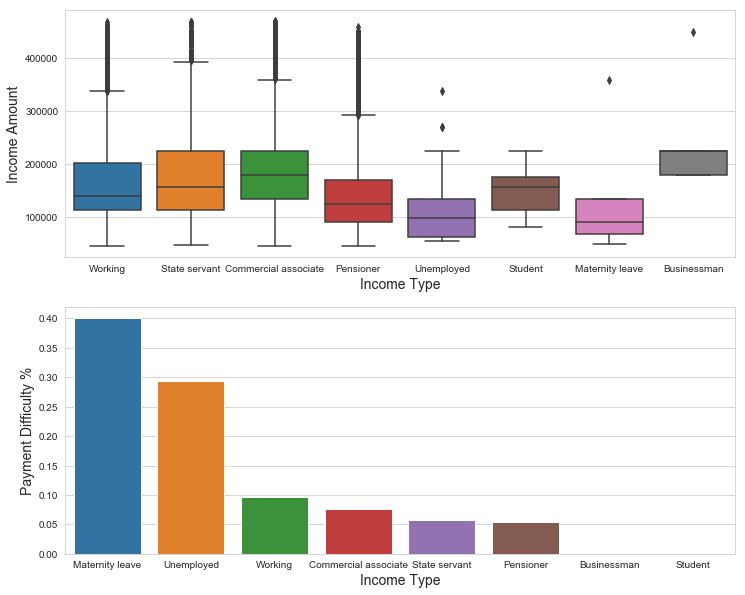

In [1453]:
plot_cat_continuous_bivariate('NAME_INCOME_TYPE','AMT_INCOME_TOTAL','Income Type','Income Amount',12,10,True)

# Plot indicates that Unemployed and Maternity Leave Income type clients have less than 1L income on Average.
# Since their income is very less,both Maternity and Unemployed category face huge payment difficulties compared to other categories.

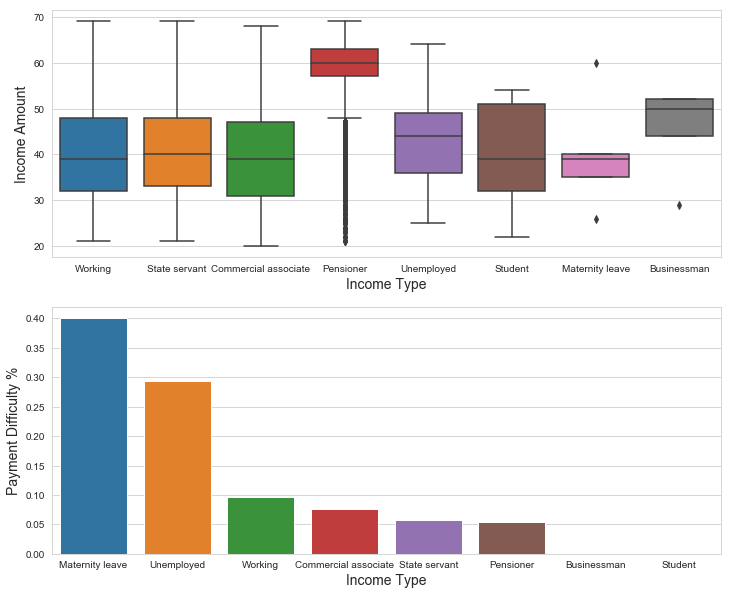

In [1454]:
plot_cat_continuous_bivariate('NAME_INCOME_TYPE','YEARS_BIRTH','Income Type','Income Amount',12,10,True)

In [1455]:
def plot_continuous_continuous_bivariate(column1,column2,xlabel,ylabel):
    g = sns.jointplot(column1, column2,data =df_merge,facecolor= 'y',edgecolor='g',height=8)
    g.set_axis_labels(xlabel,ylabel,fontsize=14)
    plt.show()

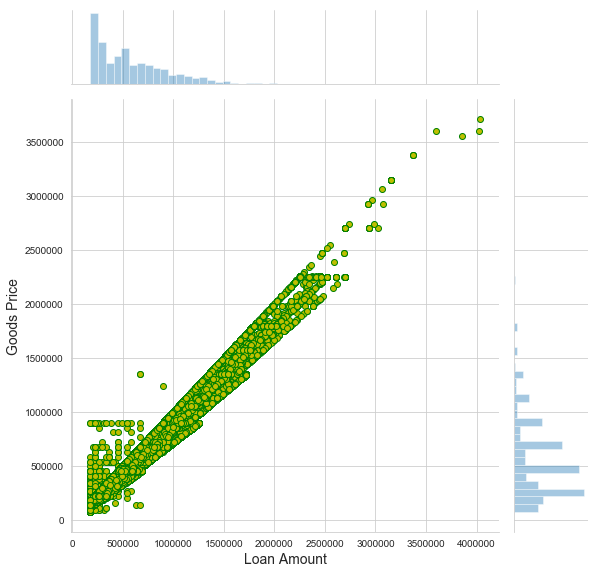

In [1456]:
plot_continuous_continuous_bivariate('AMT_CREDIT_x','AMT_GOODS_PRICE_x','Loan Amount','Goods Price')

# Plot indicates that Credit Amount and Goods Price are directly propotional to each other

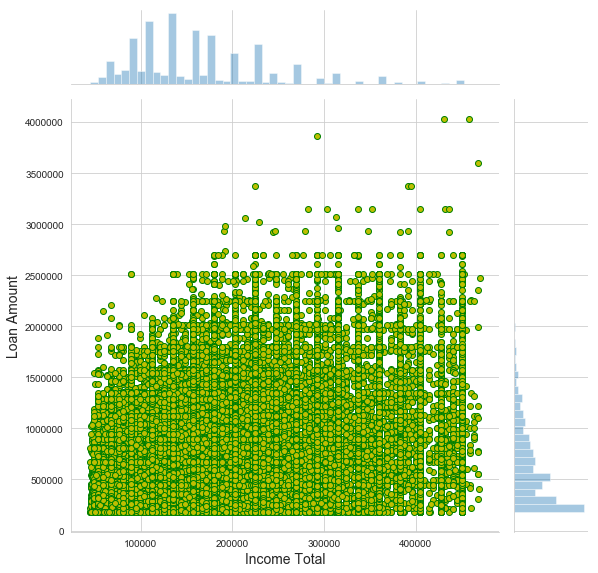

In [1457]:
plot_continuous_continuous_bivariate('AMT_INCOME_TOTAL','AMT_CREDIT_x','Income Total','Loan Amount')

# Plot indicates that there are certain outliers where the income is less and Loan amount is more.
# These loans have huge risk of Non-repayment
# Ex:- Income less than 3L and Loan Amount near to 40L and Income around 2.2L but Loan amount of 34L

## Multivariate Analysis

In [1458]:
def plot_discrete_multivariate(column1,column2,column3,xlabel,ylabel,figx=12,figy=6,stacked=False):
    if stacked == True:
        fig, axes = plt.subplots(nrows=2, figsize=(figx,figy))
    else:
        fig, axes = plt.subplots(ncols=2, figsize=(figx,figy))
    
    g = sns.boxplot(ax=axes[0], x = column1,y=column2,hue=column3,data=df_merge,palette='Set2')
    g.set_xlabel(xlabel,fontsize=14)
    g.set_ylabel(ylabel,fontsize=14)
    g.legend(loc='upper right')
    class1 = df_merge[[column1, 'TARGET']].groupby(column1,as_index=False).mean()
    class1.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(ax=axes[1], x = column1,y='TARGET', data=class1,palette='Set3')
    s.set_xlabel(xlabel,fontsize=14)
    s.set_ylabel("Payment Difficulty % Case 1",fontsize=14)
       
    plt.show()

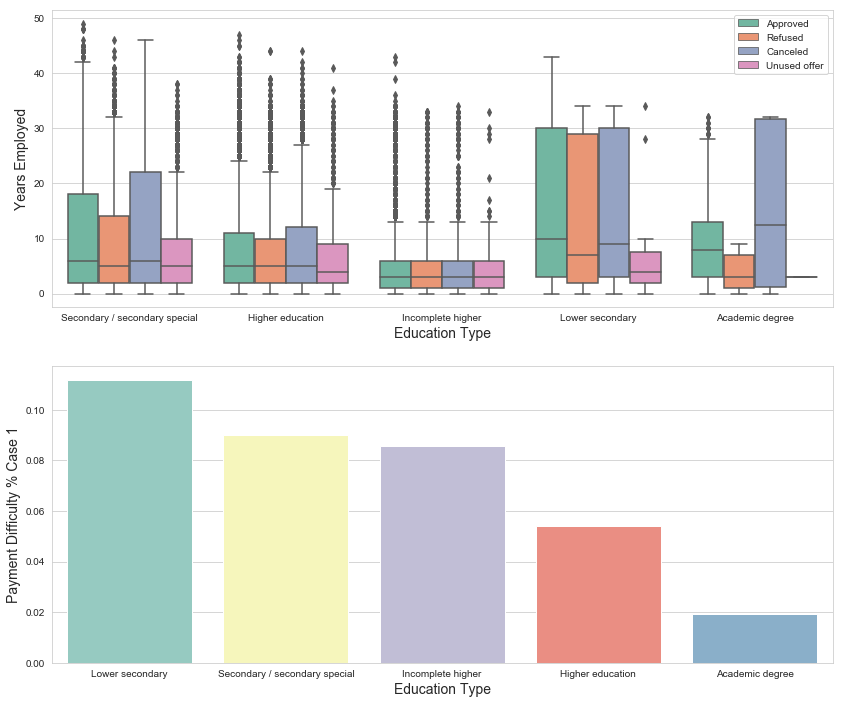

In [1459]:
plot_discrete_multivariate('NAME_EDUCATION_TYPE','YEARS_EMPLOYED','NAME_CONTRACT_STATUS','Education Type','Years Employed',14,12,True)

# Plot indicates that there is huge amount of Academic degree holders with 5 to 30 years of experience
# have applied for loan but cancelled it. But Academic degree holders have the least Payment difficulty
# Also lot of loan approvals are seen for lower secondary category who struggle for loan payment

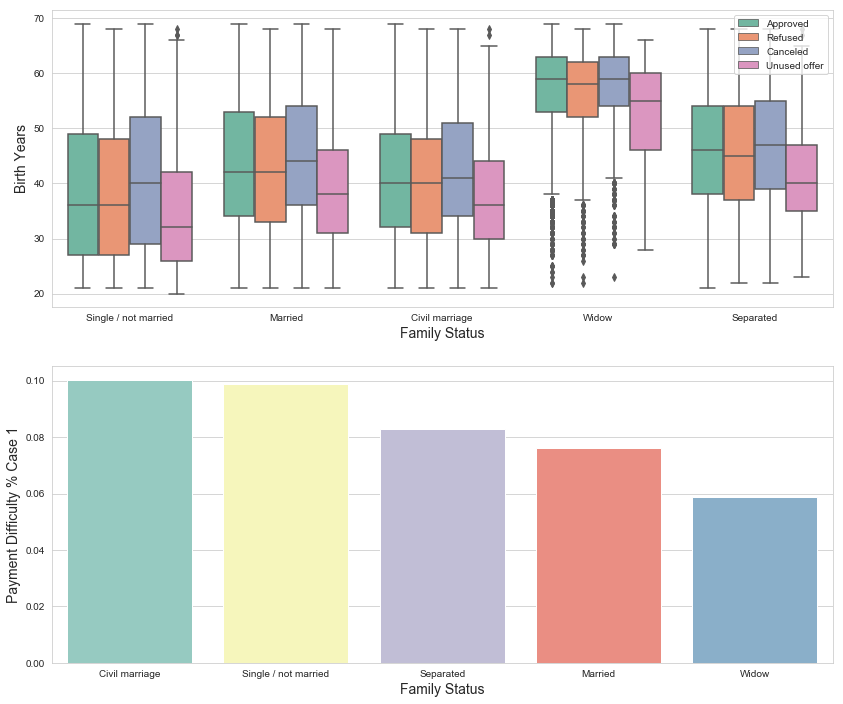

In [1460]:
plot_discrete_multivariate('NAME_FAMILY_STATUS','YEARS_BIRTH','NAME_CONTRACT_STATUS','Family Status',
                           'Birth Years',14,12,True)

# Plot indicates that widow category above age 45 have huge amount of previous unused offers even though 
# they face the least payment difficulties

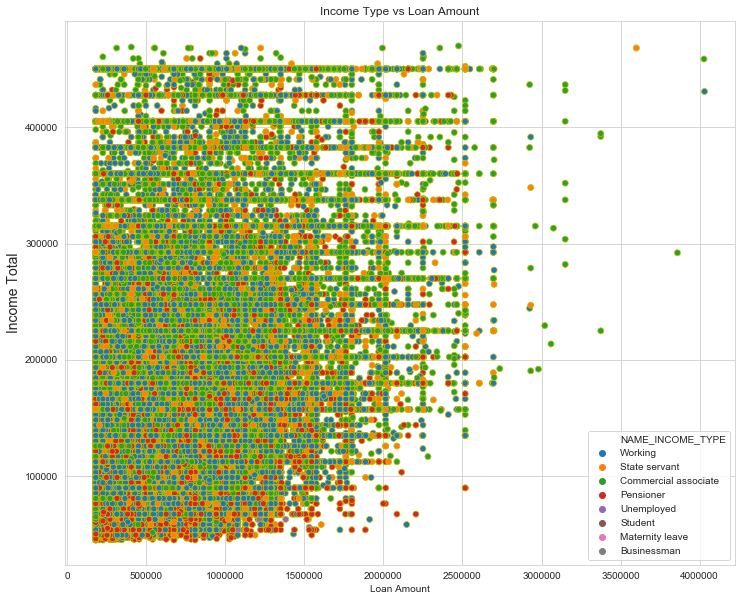

In [1462]:
plt.figure(figsize=(12,10))
g = sns.scatterplot('AMT_CREDIT_x','AMT_INCOME_TOTAL',hue='NAME_INCOME_TYPE',data=df_merge,facecolor='None',edgecolor='y')
g.set_ylabel('Income Total',fontsize=14)
g.set_xlabel('Loan Amount')
plt.title('Income Type vs Loan Amount')
plt.show()

# Plot indicates that most of the Loans are taken by Commercial Associate and Working category client
# Certain pensioners have applied for loan amount of 25L but income less than 1L which is a High risk loan category
# Most of the average loan amount is well within 25L but with certain outliers majorly from the Commercial Associate category
